In [2]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [38]:
train_data = h5py.File('train_happy.h5') 
test_data = h5py.File('test_happy.h5')

In [39]:
X_train = train_data['train_set_x']
y_train = train_data['train_set_y']
X_test = test_data['test_set_x']
y_test = test_data['test_set_y']

y_test

<HDF5 dataset "test_set_y": shape (150,), type "<i8">

In [40]:
X_test = np.array(X_test[:])
X_train = np.array(X_train[:])
y_test = np.array(y_test[:])
y_train = np.array(y_train[:])
y_train.shape
y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [41]:
y_train = y_train.reshape((X_train.shape[0], 1))#eshape((1, y_train.shape[0]))
y_test = y_test.reshape((y_test.shape[0], 1))  #reshape((1, y_test.shape[0]))
y_test

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [42]:
X_train = X_train.astype('float32') / 255 # changing the images to 0 and 1
X_test = X_test.astype('float32') / 255

In [43]:
from keras.utils import to_categorical

In [44]:
y_train = to_categorical(y_train, 3) # This is to match the image last column size
y_test = to_categorical(y_test, 3)
y_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [45]:
from sklearn.model_selection import train_test_split

train_data, val_data,train_labels,  val_labels = train_test_split(X_train, y_train, test_size=0.1, random_state=30)

In [46]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 3)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 3)


Image shape : (64, 64, 3)


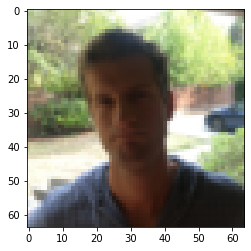

In [47]:
print("Image shape :",X_train[10].shape)
imshow(X_train[10])

In [48]:
model = Sequential([
                    Conv2D(filters=4, kernel_size=(3,3), activation='relu', padding='same',
                     input_shape=(64, 64, 3)),
                    MaxPooling2D(pool_size=(2,2)), 
                    Conv2D(filters=4, kernel_size=(3,3), activation='relu', padding='same'),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(filters=2, kernel_size=(3,3), activation='relu', padding='same'),
                    MaxPooling2D(pool_size=(2,2)), 
                    Flatten(), # we flattern bcos we are going to have a dense layer
                    # Densely connected layers
                    Dense(64, activation='relu'),
                    # output layer
                    Dense(3, activation='softmax')
                                             ])

In [49]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])

In [50]:
history_model = model.fit(train_data, train_labels, epochs = 12, batch_size=1,
                          validation_data=(val_data, val_labels))

Epoch 1/12
540/540 [==============================] - 3s 4ms/step - loss: 0.4782 - accuracy: 0.5444 - val_loss: 0.4409 - val_accuracy: 0.6500
Epoch 2/12
540/540 [==============================] - 2s 4ms/step - loss: 0.4222 - accuracy: 0.6519 - val_loss: 0.3477 - val_accuracy: 0.7667
Epoch 3/12
540/540 [==============================] - 2s 3ms/step - loss: 0.2942 - accuracy: 0.7981 - val_loss: 0.2231 - val_accuracy: 0.9000
Epoch 4/12
540/540 [==============================] - 2s 3ms/step - loss: 0.2155 - accuracy: 0.8685 - val_loss: 0.2165 - val_accuracy: 0.8333
Epoch 5/12
540/540 [==============================] - 2s 3ms/step - loss: 0.1716 - accuracy: 0.9000 - val_loss: 0.1105 - val_accuracy: 0.9500
Epoch 6/12
540/540 [==============================] - 2s 3ms/step - loss: 0.1265 - accuracy: 0.9259 - val_loss: 0.1186 - val_accuracy: 0.9500
Epoch 7/12
540/540 [==============================] - 2s 4ms/step - loss: 0.1100 - accuracy: 0.9426 - val_loss: 0.0545 - val_accuracy: 0.9833
Epoch 

### Evaluate / Test

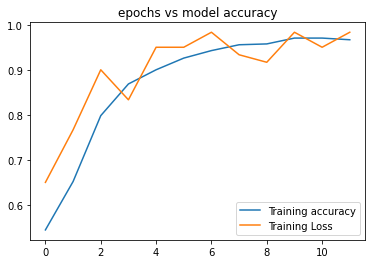

In [51]:
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['val_accuracy']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs model accuracy')
plt.legend()

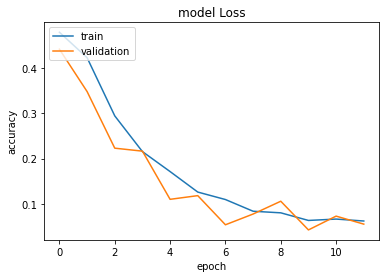

In [52]:

plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.title('model Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Evaluate Test set

In [53]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=1)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

150/150 [==============================] - 0s 2ms/step - loss: 0.0823 - accuracy: 0.9667
Test loss: 0.0823 accuracy: 0.9667


In [81]:
y_predicting = model.predict(X_test)
y_predicting = (y_predicting > 0.5)


5/5 [==============================] - 0s 11ms/step


In [82]:
y_predicting

array([[False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [Fa

In [85]:
y_test = (y_test > 0.5)

In [89]:
print(np.argmax(y_test, axis = 1))

[1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0
 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1
 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1
 1 0]


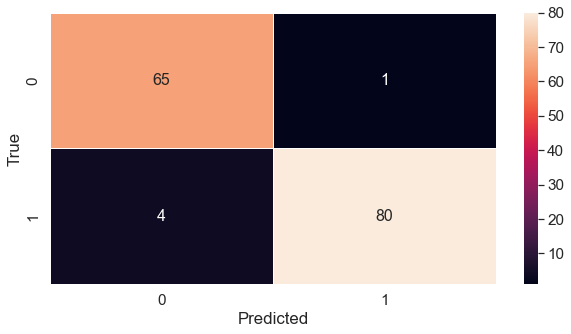

In [95]:
cm = confusion_matrix((np.argmax(y_test, axis = 1)), (np.argmax(y_predicting, axis=1)))
plt.figure(figsize=(10, 5))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d',linewidths=0.5) 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [110]:
text_label = ['Not Happy', 'Happy']

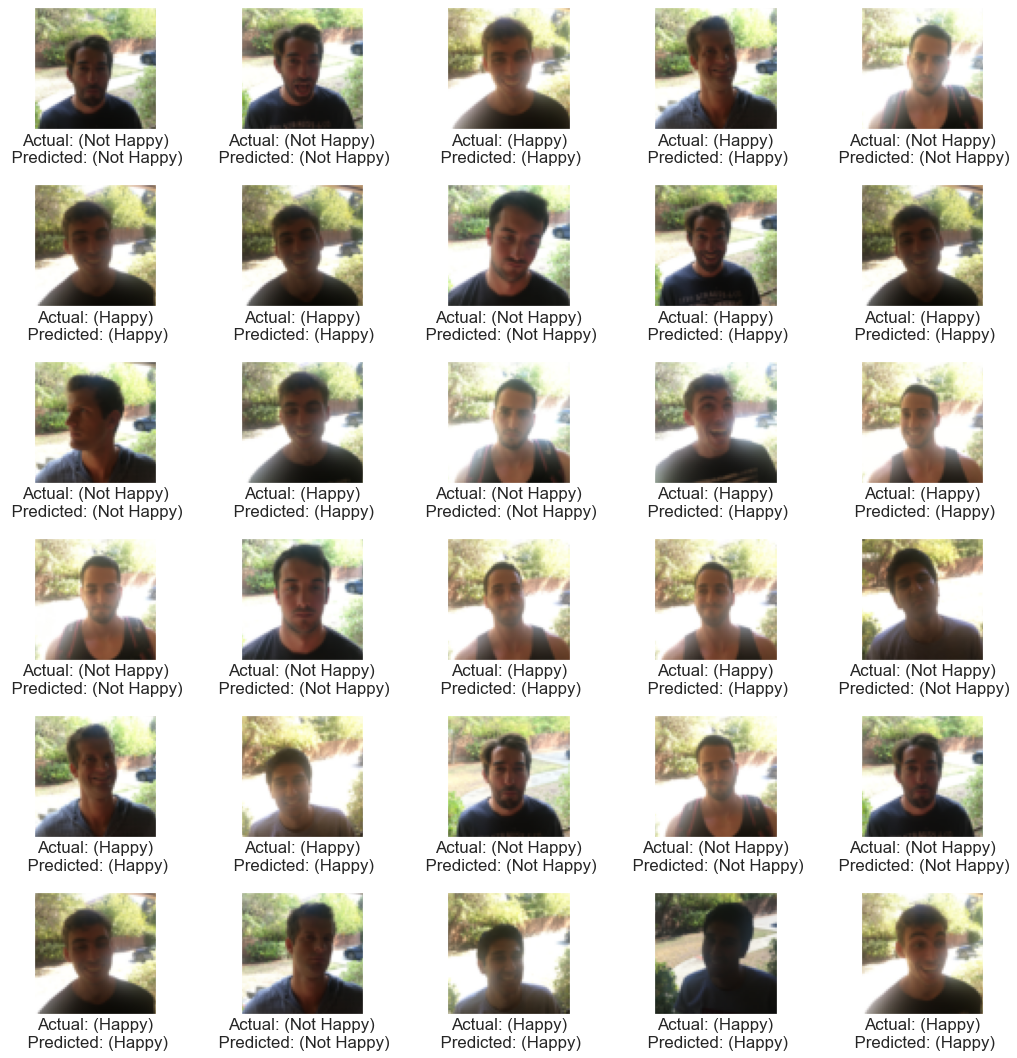

In [115]:
# Another view, showing 30 randomly selected images at a time
plt.figure(figsize=(15,15)) # setting the size of the image
for i in range(30): # indicating number of images to show
    plt.subplot(6, 5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 149)
    plt.imshow(X_test[img_index], cmap=plt.cm.gray)
    # plt.xlabel(text_label[np.argmax(y_test, axis = 1)[img_index]])
    # plt.xlabel(text_label[np.argmax(y_predicting, axis = 1)[img_index]])

    plt.xlabel("Actual: ({})\n Predicted: ({})".format(
        text_label[np.argmax(y_test, axis = 1)[img_index]], text_label[np.argmax(y_predicting, axis = 1)[img_index]]))
    
    
plt.tight_layout()
plt.show()